In [1]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as units
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astroquery.irsa_dust import IrsaDust

import healpy as hp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from dustmaps.sfd import SFDQuery
from dustmaps.planck import PlanckQuery
from dustmaps.bayestar import BayestarQuery




In [2]:
import os

In [3]:

os.listdir("/Users/pbrown/Desktop/SN/github/ebv_tools/")
ebv_map = hp.read_map('/Users/pbrown/Desktop/SN/github/ebv_tools/ebv_lhd.hpx.fits', verbose=False)
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'



In [4]:
name='NGC4258'
coord = SkyCoord.from_name(name, frame = 'icrs')
s_gal = coord.galactic
glon = s_gal.l.value
glat = s_gal.b.value
# get pixel numbers
galpix = hp.ang2pix(nside, glon, glat, lonlat=True)
print(galpix)
# get reddening for these pixels
ebv_los = ebv_map[galpix]
print(ebv_los)


424828
0.015596184879541397


In [5]:
imagename=name+'_4comparison.png'
ra0 = coord.ra
dec0 = coord.dec


In [6]:
ra = np.arange(ra0.degree - 2., ra0.degree + 2., 0.05)
dec = np.arange(dec0.degree - 2., dec0.degree + 2., 0.05)

ragrid, decgrid = np.meshgrid(ra, dec)
coords = SkyCoord(ragrid*units.deg, decgrid*units.deg, frame='icrs')

sfd = SFDQuery()
# this conversion puts Av on the Schlafly system
Av_sfd = 2.742 * sfd(coords)

planck = PlanckQuery()
Av_planck = 3.1 * planck(coords)


In [7]:

coords = SkyCoord(ragrid*units.deg, decgrid*units.deg,
                  distance=1000000.*units.kpc, frame='galactic')
bayestar = BayestarQuery(max_samples=1)
Av_bayestar = 2.742 * bayestar(coords)
print('done with Bayestar')

Av_HI=0*Av_sfd

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 72.431 s
  pix_info:   2.654 s
   samples:  34.014 s
      best:  20.956 s
       nan:   0.938 s
      sort:  13.366 s
       idx:   0.502 s
done with Bayestar


In [8]:
maxboth=max(np.amax(Av_planck),np.amax(Av_sfd))
print(maxboth)

0.17722937874495984


In [9]:
print(np.shape(Av_HI))

(80, 80)


In [10]:
nside = hp.get_nside(ebv_map)

npix = hp.nside2npix(nside)
ordering = 'ring'
s_gal = coords.galactic

glon = s_gal.l.value
glat = s_gal.b.value
# get pixel numbers
pix = hp.ang2pix(nside, glon, glat, lonlat=True)
#print(pix)
# get reddening for these pixels
ebv_los = ebv_map[pix]
for i in range(len(dec)-1):
    for j in range(len(ra)-1):
        stepcoord = SkyCoord(ra[i]*units.deg, dec[j]*units.deg, frame='icrs')
        print(stepcoord)
        stepgal = stepcoord.galactic
        steplon = stepgal.l.value
        steplat = stepgal.b.value
        # get pixel numbers
        steppix = hp.ang2pix(nside, steplon, steplat, lonlat=True)
        print(steppix)
        ebv=ebv_map[steppix]
        Av_HI[j,i]=ebv*2.742
    #print(ebv)
#AV_HI=2.742*ebv_los
#print('done with AV_HI')

<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.30371944)>
374805
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.35371944)>
376539
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.40371944)>
378276
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.45371944)>
380017
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.50371944)>
381763
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.55371944)>
383512
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.60371944)>
385265
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.65371944)>
387022
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.70371944)>
388784
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.75371944)>
390549
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.80371944)>
392318
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.85371944)>
392318
<SkyCoord (ICRS): (ra, dec) in deg
    (182.74008333, 45.90371944)>
395869
<SkyCoord (ICRS): (ra, de

435980
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.15371944)>
437849
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.20371944)>
441600
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.25371944)>
443481
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.30371944)>
443481
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.35371944)>
445366
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.40371944)>
449149
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.45371944)>
449149
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.50371944)>
451046
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.55371944)>
452947
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.60371944)>
456762
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.65371944)>
456762
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.70371944)>
458675
<SkyCoord (ICRS): (ra, dec) in deg
    (182.79008333, 47.75371944)>
460592
<SkyCoord (ICRS): 

    (182.89008333, 45.35371944)>
374804
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.40371944)>
376537
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.45371944)>
378274
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.50371944)>
380016
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.55371944)>
381761
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.60371944)>
383510
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.65371944)>
383510
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.70371944)>
387021
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.75371944)>
388782
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.80371944)>
390547
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.85371944)>
390547
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.90371944)>
394090
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 45.95371944)>
395867
<SkyCoord (ICRS): (ra, dec) in deg
    (182.89008333, 46.003

    (182.94008333, 48.05371944)>
470237
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.10371944)>
474124
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.15371944)>
474124
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.20371944)>
476073
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.25371944)>
478026
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.30371944)>
481945
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.35371944)>
481945
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.40371944)>
483910
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.45371944)>
485879
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.50371944)>
487853
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.55371944)>
489830
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.60371944)>
491811
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.65371944)>
493796
<SkyCoord (ICRS): (ra, dec) in deg
    (182.94008333, 48.703

    (183.04008333, 47.00371944)>
430393
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.05371944)>
432251
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.10371944)>
434112
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.15371944)>
435977
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.20371944)>
437847
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.25371944)>
439720
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.30371944)>
441597
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.35371944)>
443478
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.40371944)>
445364
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.45371944)>
447253
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.50371944)>
449146
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.55371944)>
449146
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.60371944)>
452945
<SkyCoord (ICRS): (ra, dec) in deg
    (183.04008333, 47.653

381758
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.70371944)>
383507
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.75371944)>
385261
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.80371944)>
387018
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.85371944)>
388779
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.90371944)>
390544
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 45.95371944)>
392314
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.00371944)>
394087
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.05371944)>
395864
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.10371944)>
395864
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.15371944)>
399431
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.20371944)>
401220
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.25371944)>
403013
<SkyCoord (ICRS): (ra, dec) in deg
    (183.14008333, 46.30371944)>
404811
<SkyCoord (ICRS): 

    (183.19008333, 47.20371944)>
435976
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.25371944)>
437845
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.30371944)>
439718
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.35371944)>
443477
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.40371944)>
443477
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.45371944)>
445362
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.50371944)>
447251
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.55371944)>
449145
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.60371944)>
451042
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.65371944)>
452943
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.70371944)>
454848
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.75371944)>
456758
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.80371944)>
458671
<SkyCoord (ICRS): (ra, dec) in deg
    (183.19008333, 47.853

383506
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 45.80371944)>
385259
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 45.85371944)>
387016
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 45.90371944)>
388778
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 45.95371944)>
390543
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.00371944)>
392312
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.05371944)>
394085
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.10371944)>
395863
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.15371944)>
397644
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.20371944)>
399429
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.25371944)>
399429
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.30371944)>
403012
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.35371944)>
404809
<SkyCoord (ICRS): (ra, dec) in deg
    (183.29008333, 46.40371944)>
406610
<SkyCoord (ICRS): 

474120
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.30371944)>
476069
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.35371944)>
478022
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.40371944)>
478022
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.45371944)>
481941
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.50371944)>
483906
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.55371944)>
485875
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.60371944)>
485875
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.65371944)>
489826
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.70371944)>
491807
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.75371944)>
493792
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.80371944)>
495782
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.85371944)>
497775
<SkyCoord (ICRS): (ra, dec) in deg
    (183.34008333, 48.90371944)>
499772
<SkyCoord (ICRS): 

410223
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.60371944)>
410223
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.65371944)>
413854
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.70371944)>
415675
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.75371944)>
417500
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.80371944)>
417500
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.85371944)>
421163
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.90371944)>
423000
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 46.95371944)>
423000
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 47.00371944)>
426687
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 47.05371944)>
428536
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 47.10371944)>
428536
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 47.15371944)>
430389
<SkyCoord (ICRS): (ra, dec) in deg
    (183.44008333, 47.20371944)>
434108
<SkyCoord (ICRS): 

485874
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.65371944)>
487847
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.70371944)>
489824
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.75371944)>
491806
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.80371944)>
493791
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.85371944)>
495780
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.90371944)>
497773
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 48.95371944)>
499771
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 49.00371944)>
501772
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 49.05371944)>
503777
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 49.10371944)>
505787
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 49.15371944)>
507800
<SkyCoord (ICRS): (ra, dec) in deg
    (183.49008333, 49.20371944)>
509817
<SkyCoord (ICRS): (ra, dec) in deg
    (183.54008333, 45.30371944)>
366190
<SkyCoord (ICRS): 

404806
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.50371944)>
406607
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.55371944)>
408412
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.60371944)>
410222
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.65371944)>
412035
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.70371944)>
413852
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.75371944)>
413852
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.80371944)>
417499
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.85371944)>
419328
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.90371944)>
421161
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 46.95371944)>
421161
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 47.00371944)>
424840
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 47.05371944)>
426685
<SkyCoord (ICRS): (ra, dec) in deg
    (183.59008333, 47.10371944)>
426685
<SkyCoord (ICRS): 

464430
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.15371944)>
468293
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.20371944)>
468293
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.25371944)>
470230
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.30371944)>
472171
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.35371944)>
476066
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.40371944)>
476066
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.45371944)>
478019
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.50371944)>
479976
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.55371944)>
483903
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.60371944)>
483903
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.65371944)>
485872
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.70371944)>
489823
<SkyCoord (ICRS): (ra, dec) in deg
    (183.64008333, 48.75371944)>
489823
<SkyCoord (ICRS): 

    (183.74008333, 46.10371944)>
390538
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.15371944)>
392307
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.20371944)>
395858
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.25371944)>
395858
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.30371944)>
397639
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.35371944)>
399424
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.40371944)>
401214
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.45371944)>
403007
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.50371944)>
404804
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.55371944)>
406605
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.60371944)>
408411
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.65371944)>
410220
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.70371944)>
412033
<SkyCoord (ICRS): (ra, dec) in deg
    (183.74008333, 46.753

    (183.79008333, 48.55371944)>
479975
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.60371944)>
481936
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.65371944)>
485871
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.70371944)>
487844
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.75371944)>
487844
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.80371944)>
489821
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.85371944)>
493788
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.90371944)>
495777
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 48.95371944)>
495777
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 49.00371944)>
499768
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 49.05371944)>
501769
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 49.10371944)>
501769
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 49.15371944)>
503774
<SkyCoord (ICRS): (ra, dec) in deg
    (183.79008333, 49.203

406604
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.65371944)>
408409
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.70371944)>
410218
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.75371944)>
412032
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.80371944)>
413849
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.85371944)>
415670
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.90371944)>
417496
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 46.95371944)>
419325
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.00371944)>
421158
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.05371944)>
422995
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.10371944)>
424837
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.15371944)>
426682
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.20371944)>
428531
<SkyCoord (ICRS): (ra, dec) in deg
    (183.89008333, 47.25371944)>
430385
<SkyCoord (ICRS): 

    (183.94008333, 48.45371944)>
476063
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.50371944)>
478016
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.55371944)>
478016
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.60371944)>
481935
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.65371944)>
483900
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.70371944)>
485869
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.75371944)>
485869
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.80371944)>
489820
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.85371944)>
491801
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.90371944)>
491801
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 48.95371944)>
495776
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 49.00371944)>
497769
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 49.05371944)>
499766
<SkyCoord (ICRS): (ra, dec) in deg
    (183.94008333, 49.103

403004
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.55371944)>
403004
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.60371944)>
404801
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.65371944)>
406602
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.70371944)>
410217
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.75371944)>
410217
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.80371944)>
412030
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.85371944)>
413847
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.90371944)>
415669
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 46.95371944)>
417494
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 47.00371944)>
419323
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 47.05371944)>
422994
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 47.10371944)>
422994
<SkyCoord (ICRS): (ra, dec) in deg
    (184.04008333, 47.15371944)>
424835
<SkyCoord (ICRS): 

    (184.09008333, 48.15371944)>
462500
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.20371944)>
464426
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.25371944)>
466355
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.30371944)>
468288
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.35371944)>
470225
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.40371944)>
472167
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.45371944)>
474112
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.50371944)>
476061
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.55371944)>
478015
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.60371944)>
479972
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.65371944)>
481933
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.70371944)>
483898
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.75371944)>
485868
<SkyCoord (ICRS): (ra, dec) in deg
    (184.09008333, 48.803

401209
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.55371944)>
401209
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.60371944)>
403002
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.65371944)>
406601
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.70371944)>
408406
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.75371944)>
408406
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.80371944)>
410215
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.85371944)>
413846
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.90371944)>
413846
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 46.95371944)>
415667
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 47.00371944)>
419322
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 47.05371944)>
421155
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 47.10371944)>
421155
<SkyCoord (ICRS): (ra, dec) in deg
    (184.19008333, 47.15371944)>
422992
<SkyCoord (ICRS): 

476060
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.55371944)>
476060
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.60371944)>
478013
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.65371944)>
479970
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.70371944)>
483897
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.75371944)>
483897
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.80371944)>
485866
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.85371944)>
489817
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.90371944)>
489817
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 48.95371944)>
491798
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 49.00371944)>
493783
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 49.05371944)>
497766
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 49.10371944)>
497766
<SkyCoord (ICRS): (ra, dec) in deg
    (184.24008333, 49.15371944)>
499763
<SkyCoord (ICRS): 

388766
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.30371944)>
392301
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.35371944)>
394074
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.40371944)>
394074
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.45371944)>
397633
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.50371944)>
399418
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.55371944)>
399418
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.60371944)>
401207
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.65371944)>
404798
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.70371944)>
406599
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.75371944)>
406599
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.80371944)>
410214
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.85371944)>
412027
<SkyCoord (ICRS): (ra, dec) in deg
    (184.34008333, 46.90371944)>
412027
<SkyCoord (ICRS): 

466352
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.40371944)>
468285
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.45371944)>
472164
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.50371944)>
474109
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.55371944)>
474109
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.60371944)>
476058
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.65371944)>
479969
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.70371944)>
479969
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.75371944)>
481930
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.80371944)>
485865
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.85371944)>
487838
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.90371944)>
487838
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 48.95371944)>
489815
<SkyCoord (ICRS): (ra, dec) in deg
    (184.39008333, 49.00371944)>
493782
<SkyCoord (ICRS): 

385246
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.25371944)>
388765
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.30371944)>
390530
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.35371944)>
392299
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.40371944)>
392299
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.45371944)>
395850
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.50371944)>
397631
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.55371944)>
397631
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.60371944)>
401206
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.65371944)>
402999
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.70371944)>
404796
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.75371944)>
404796
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.80371944)>
408403
<SkyCoord (ICRS): (ra, dec) in deg
    (184.49008333, 46.85371944)>
410212
<SkyCoord (ICRS): 

<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.70371944)>
478010
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.75371944)>
481929
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.80371944)>
483894
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.85371944)>
485863
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.90371944)>
485863
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 48.95371944)>
489814
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 49.00371944)>
491795
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 49.05371944)>
493780
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 49.10371944)>
495770
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 49.15371944)>
497763
<SkyCoord (ICRS): (ra, dec) in deg
    (184.54008333, 49.20371944)>
499760
<SkyCoord (ICRS): (ra, dec) in deg
    (184.59008333, 45.30371944)>
354298
<SkyCoord (ICRS): (ra, dec) in deg
    (184.59008333, 45.35371944)>
355983
<SkyCoord (ICRS): (ra, de

406596
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 46.85371944)>
408401
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 46.90371944)>
410211
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 46.95371944)>
412024
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.00371944)>
413841
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.05371944)>
415662
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.10371944)>
417488
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.15371944)>
419317
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.20371944)>
421150
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.25371944)>
422988
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.30371944)>
424829
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.35371944)>
426674
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.40371944)>
428523
<SkyCoord (ICRS): (ra, dec) in deg
    (184.64008333, 47.45371944)>
430377
<SkyCoord (ICRS): 

485862
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 48.95371944)>
487835
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 49.00371944)>
489812
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 49.05371944)>
491794
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 49.10371944)>
493779
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 49.15371944)>
495768
<SkyCoord (ICRS): (ra, dec) in deg
    (184.69008333, 49.20371944)>
499759
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.30371944)>
352615
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.35371944)>
354296
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.40371944)>
357671
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.45371944)>
357671
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.50371944)>
359364
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.55371944)>
361061
<SkyCoord (ICRS): (ra, dec) in deg
    (184.74008333, 45.60371944)>
364468
<SkyCoord (ICRS): 

    (184.79008333, 47.05371944)>
415661
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.10371944)>
415661
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.15371944)>
417486
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.20371944)>
421149
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.25371944)>
421149
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.30371944)>
422986
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.35371944)>
424827
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.40371944)>
428522
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.45371944)>
428522
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.50371944)>
430375
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.55371944)>
434094
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.60371944)>
434094
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.65371944)>
435959
<SkyCoord (ICRS): (ra, dec) in deg
    (184.79008333, 47.703

491792
<SkyCoord (ICRS): (ra, dec) in deg
    (184.84008333, 49.15371944)>
495767
<SkyCoord (ICRS): (ra, dec) in deg
    (184.84008333, 49.20371944)>
497760
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.30371944)>
350936
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.35371944)>
352613
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.40371944)>
355980
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.45371944)>
355980
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.50371944)>
357669
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.55371944)>
361060
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.60371944)>
362761
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.65371944)>
362761
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.70371944)>
366176
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.75371944)>
367889
<SkyCoord (ICRS): (ra, dec) in deg
    (184.89008333, 45.80371944)>
367889
<SkyCoord (ICRS): 

443459
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 47.90371944)>
445344
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 47.95371944)>
445344
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.00371944)>
449127
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.05371944)>
451024
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.10371944)>
452925
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.15371944)>
452925
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.20371944)>
456740
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.25371944)>
458653
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.30371944)>
458653
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.35371944)>
462492
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.40371944)>
464417
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.45371944)>
466346
<SkyCoord (ICRS): (ra, dec) in deg
    (184.94008333, 48.50371944)>
468280
<SkyCoord (ICRS): 

    (185.04008333, 45.55371944)>
359361
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.60371944)>
361058
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.65371944)>
361058
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.70371944)>
364465
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.75371944)>
366174
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.80371944)>
366174
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.85371944)>
369605
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.90371944)>
371326
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 45.95371944)>
373051
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 46.00371944)>
373051
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 46.05371944)>
376514
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 46.10371944)>
378251
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 46.15371944)>
378251
<SkyCoord (ICRS): (ra, dec) in deg
    (185.04008333, 46.203

424824
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.45371944)>
426670
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.50371944)>
428519
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.55371944)>
430372
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.60371944)>
430372
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.65371944)>
434091
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.70371944)>
435956
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.75371944)>
437825
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.80371944)>
439699
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.85371944)>
441576
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.90371944)>
443457
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 47.95371944)>
445343
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 48.00371944)>
447232
<SkyCoord (ICRS): (ra, dec) in deg
    (185.09008333, 48.05371944)>
449125
<SkyCoord (ICRS): 

489808
<SkyCoord (ICRS): (ra, dec) in deg
    (185.14008333, 49.15371944)>
491789
<SkyCoord (ICRS): (ra, dec) in deg
    (185.14008333, 49.20371944)>
495764
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.30371944)>
347590
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.35371944)>
350933
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.40371944)>
352610
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.45371944)>
352610
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.50371944)>
355977
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.55371944)>
357666
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.60371944)>
359359
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.65371944)>
361057
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.70371944)>
362758
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.75371944)>
364463
<SkyCoord (ICRS): (ra, dec) in deg
    (185.19008333, 45.80371944)>
364463
<SkyCoord (ICRS): 

<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 46.75371944)>
399409
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 46.80371944)>
401198
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 46.85371944)>
402991
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 46.90371944)>
402991
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 46.95371944)>
406590
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.00371944)>
408395
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.05371944)>
410204
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.10371944)>
412018
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.15371944)>
413835
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.20371944)>
415656
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.25371944)>
417482
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.30371944)>
419311
<SkyCoord (ICRS): (ra, dec) in deg
    (185.24008333, 47.35371944)>
421144
<SkyCoord (ICRS): (ra, de

472155
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 48.75371944)>
474100
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 48.80371944)>
476049
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 48.85371944)>
479960
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 48.90371944)>
479960
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 48.95371944)>
481921
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 49.00371944)>
485856
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 49.05371944)>
487829
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 49.10371944)>
487829
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 49.15371944)>
491788
<SkyCoord (ICRS): (ra, dec) in deg
    (185.29008333, 49.20371944)>
493773
<SkyCoord (ICRS): (ra, dec) in deg
    (185.34008333, 45.30371944)>
347589
<SkyCoord (ICRS): (ra, dec) in deg
    (185.34008333, 45.35371944)>
349258
<SkyCoord (ICRS): (ra, dec) in deg
    (185.34008333, 45.40371944)>
350931
<SkyCoord (ICRS): 

399407
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 46.85371944)>
401196
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 46.90371944)>
402990
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 46.95371944)>
404787
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.00371944)>
406588
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.05371944)>
410203
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.10371944)>
410203
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.15371944)>
412016
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.20371944)>
415655
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.25371944)>
415655
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.30371944)>
417480
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.35371944)>
419309
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.40371944)>
422980
<SkyCoord (ICRS): (ra, dec) in deg
    (185.39008333, 47.45371944)>
422980
<SkyCoord (ICRS): 

<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.55371944)>
464412
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.60371944)>
468275
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.65371944)>
470212
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.70371944)>
472153
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.75371944)>
472153
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.80371944)>
476048
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.85371944)>
478001
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.90371944)>
478001
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 48.95371944)>
481920
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 49.00371944)>
483885
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 49.05371944)>
485854
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 49.10371944)>
487828
<SkyCoord (ICRS): (ra, dec) in deg
    (185.44008333, 49.15371944)>
489805
<SkyCoord (ICRS): (ra, de

    (185.54008333, 46.25371944)>
378246
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.30371944)>
379987
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.35371944)>
383482
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.40371944)>
383482
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.45371944)>
385235
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.50371944)>
388754
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.55371944)>
388754
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.60371944)>
390519
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.65371944)>
392288
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.70371944)>
395839
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.75371944)>
395839
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.80371944)>
397620
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.85371944)>
401195
<SkyCoord (ICRS): (ra, dec) in deg
    (185.54008333, 46.903

    (185.59008333, 48.50371944)>
462485
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.55371944)>
464411
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.60371944)>
466340
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.65371944)>
468273
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.70371944)>
470210
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.75371944)>
472152
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.80371944)>
474097
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.85371944)>
476046
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.90371944)>
478000
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 48.95371944)>
479957
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 49.00371944)>
481918
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 49.05371944)>
485853
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 49.10371944)>
485853
<SkyCoord (ICRS): (ra, dec) in deg
    (185.59008333, 49.153

    (185.69008333, 46.90371944)>
401193
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 46.95371944)>
402987
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.00371944)>
404784
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.05371944)>
406585
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.10371944)>
406585
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.15371944)>
410200
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.20371944)>
412013
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.25371944)>
413830
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.30371944)>
415652
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.35371944)>
417477
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.40371944)>
419306
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.45371944)>
421140
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.50371944)>
422977
<SkyCoord (ICRS): (ra, dec) in deg
    (185.69008333, 47.553

344257
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.40371944)>
347584
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.45371944)>
349253
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.50371944)>
349253
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.55371944)>
352604
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.60371944)>
354285
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.65371944)>
354285
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.70371944)>
357660
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.75371944)>
359353
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.80371944)>
361050
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.85371944)>
362752
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.90371944)>
364457
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 45.95371944)>
366166
<SkyCoord (ICRS): (ra, dec) in deg
    (185.79008333, 46.00371944)>
366166
<SkyCoord (ICRS): 

    (185.84008333, 47.40371944)>
419305
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.45371944)>
419305
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.50371944)>
421138
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.55371944)>
424817
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.60371944)>
426662
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.65371944)>
426662
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.70371944)>
428511
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.75371944)>
432222
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.80371944)>
432222
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.85371944)>
434083
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.90371944)>
437818
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 47.95371944)>
439691
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 48.00371944)>
439691
<SkyCoord (ICRS): (ra, dec) in deg
    (185.84008333, 48.053

474094
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 48.95371944)>
477997
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 49.00371944)>
479954
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 49.05371944)>
481915
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 49.10371944)>
483881
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 49.15371944)>
485850
<SkyCoord (ICRS): (ra, dec) in deg
    (185.89008333, 49.20371944)>
487823
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.30371944)>
342598
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.35371944)>
344256
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.40371944)>
345917
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.45371944)>
347582
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.50371944)>
349252
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.55371944)>
350925
<SkyCoord (ICRS): (ra, dec) in deg
    (185.94008333, 45.60371944)>
352602
<SkyCoord (ICRS): 

    (185.99008333, 47.30371944)>
412010
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.35371944)>
415649
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.40371944)>
417474
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.45371944)>
417474
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.50371944)>
421137
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.55371944)>
422974
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.60371944)>
424815
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.65371944)>
424815
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.70371944)>
428510
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.75371944)>
430363
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.80371944)>
430363
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.85371944)>
434082
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.90371944)>
435947
<SkyCoord (ICRS): (ra, dec) in deg
    (185.99008333, 47.953

470206
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 48.85371944)>
472147
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 48.90371944)>
476042
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 48.95371944)>
476042
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 49.00371944)>
477995
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 49.05371944)>
481914
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 49.10371944)>
481914
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 49.15371944)>
483879
<SkyCoord (ICRS): (ra, dec) in deg
    (186.04008333, 49.20371944)>
487822
<SkyCoord (ICRS): (ra, dec) in deg
    (186.09008333, 45.30371944)>
342597
<SkyCoord (ICRS): (ra, dec) in deg
    (186.09008333, 45.35371944)>
342597
<SkyCoord (ICRS): (ra, dec) in deg
    (186.09008333, 45.40371944)>
344254
<SkyCoord (ICRS): (ra, dec) in deg
    (186.09008333, 45.45371944)>
345915
<SkyCoord (ICRS): (ra, dec) in deg
    (186.09008333, 45.50371944)>
347581
<SkyCoord (ICRS): 

    (186.14008333, 47.05371944)>
402982
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.10371944)>
404779
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.15371944)>
406581
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.20371944)>
408386
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.25371944)>
410195
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.30371944)>
412009
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.35371944)>
413826
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.40371944)>
415647
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.45371944)>
419302
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.50371944)>
419302
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.55371944)>
421135
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.60371944)>
422972
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.65371944)>
424814
<SkyCoord (ICRS): (ra, dec) in deg
    (186.14008333, 47.703

470205
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 48.85371944)>
472146
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 48.90371944)>
474091
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 48.95371944)>
474091
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 49.00371944)>
477994
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 49.05371944)>
479951
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 49.10371944)>
479951
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 49.15371944)>
483878
<SkyCoord (ICRS): (ra, dec) in deg
    (186.19008333, 49.20371944)>
485847
<SkyCoord (ICRS): (ra, dec) in deg
    (186.24008333, 45.30371944)>
340942
<SkyCoord (ICRS): (ra, dec) in deg
    (186.24008333, 45.35371944)>
340942
<SkyCoord (ICRS): (ra, dec) in deg
    (186.24008333, 45.40371944)>
342595
<SkyCoord (ICRS): (ra, dec) in deg
    (186.24008333, 45.45371944)>
345914
<SkyCoord (ICRS): (ra, dec) in deg
    (186.24008333, 45.50371944)>
347579
<SkyCoord (ICRS): 

    (186.29008333, 46.95371944)>
397613
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.00371944)>
399398
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.05371944)>
401187
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.10371944)>
404778
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.15371944)>
404778
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.20371944)>
406579
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.25371944)>
410194
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.30371944)>
410194
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.35371944)>
412007
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.40371944)>
413824
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.45371944)>
417471
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.50371944)>
417471
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.55371944)>
419300
<SkyCoord (ICRS): (ra, dec) in deg
    (186.29008333, 47.603

477992
<SkyCoord (ICRS): (ra, dec) in deg
    (186.34008333, 49.10371944)>
481911
<SkyCoord (ICRS): (ra, dec) in deg
    (186.34008333, 49.15371944)>
481911
<SkyCoord (ICRS): (ra, dec) in deg
    (186.34008333, 49.20371944)>
483876
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.30371944)>
339291
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.35371944)>
339291
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.40371944)>
342594
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.45371944)>
344251
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.50371944)>
345912
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.55371944)>
347578
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.60371944)>
349247
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.65371944)>
350920
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.70371944)>
350920
<SkyCoord (ICRS): (ra, dec) in deg
    (186.39008333, 45.75371944)>
354279
<SkyCoord (ICRS): 

408383
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.30371944)>
410192
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.35371944)>
410192
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.40371944)>
413823
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.45371944)>
415644
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.50371944)>
415644
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.55371944)>
419299
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.60371944)>
421132
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.65371944)>
422969
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.70371944)>
424811
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.75371944)>
426656
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.80371944)>
428505
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.85371944)>
430359
<SkyCoord (ICRS): (ra, dec) in deg
    (186.44008333, 47.90371944)>
432216
<SkyCoord (ICRS): 

472143
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 48.95371944)>
472143
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 49.00371944)>
476038
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 49.05371944)>
477991
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 49.10371944)>
479948
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 49.15371944)>
481910
<SkyCoord (ICRS): (ra, dec) in deg
    (186.49008333, 49.20371944)>
483875
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.30371944)>
337644
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.35371944)>
339289
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.40371944)>
340939
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.45371944)>
342592
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.50371944)>
344249
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.55371944)>
345911
<SkyCoord (ICRS): (ra, dec) in deg
    (186.54008333, 45.60371944)>
347576
<SkyCoord (ICRS): 

    (186.59008333, 47.20371944)>
404775
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.25371944)>
406576
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.30371944)>
408381
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.35371944)>
410191
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.40371944)>
412004
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.45371944)>
413821
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.50371944)>
415643
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.55371944)>
417468
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.60371944)>
419297
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.65371944)>
422968
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.70371944)>
422968
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.75371944)>
424809
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.80371944)>
428504
<SkyCoord (ICRS): (ra, dec) in deg
    (186.59008333, 47.853

    (186.64008333, 49.10371944)>
479947
<SkyCoord (ICRS): (ra, dec) in deg
    (186.64008333, 49.15371944)>
479947
<SkyCoord (ICRS): (ra, dec) in deg
    (186.64008333, 49.20371944)>
481908


In [11]:
print(Av_HI)

[[0.03678199 0.03678199 0.03670816 ... 0.03486471 0.03546592 0.        ]
 [0.03670947 0.03699267 0.03699003 ... 0.03504511 0.03546592 0.        ]
 [0.03685114 0.03699267 0.03701967 ... 0.03524185 0.03524185 0.        ]
 ...
 [0.06578277 0.06578277 0.06367689 ... 0.03999896 0.03999896 0.        ]
 [0.06818204 0.06697419 0.06697419 ... 0.04024665 0.03978885 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


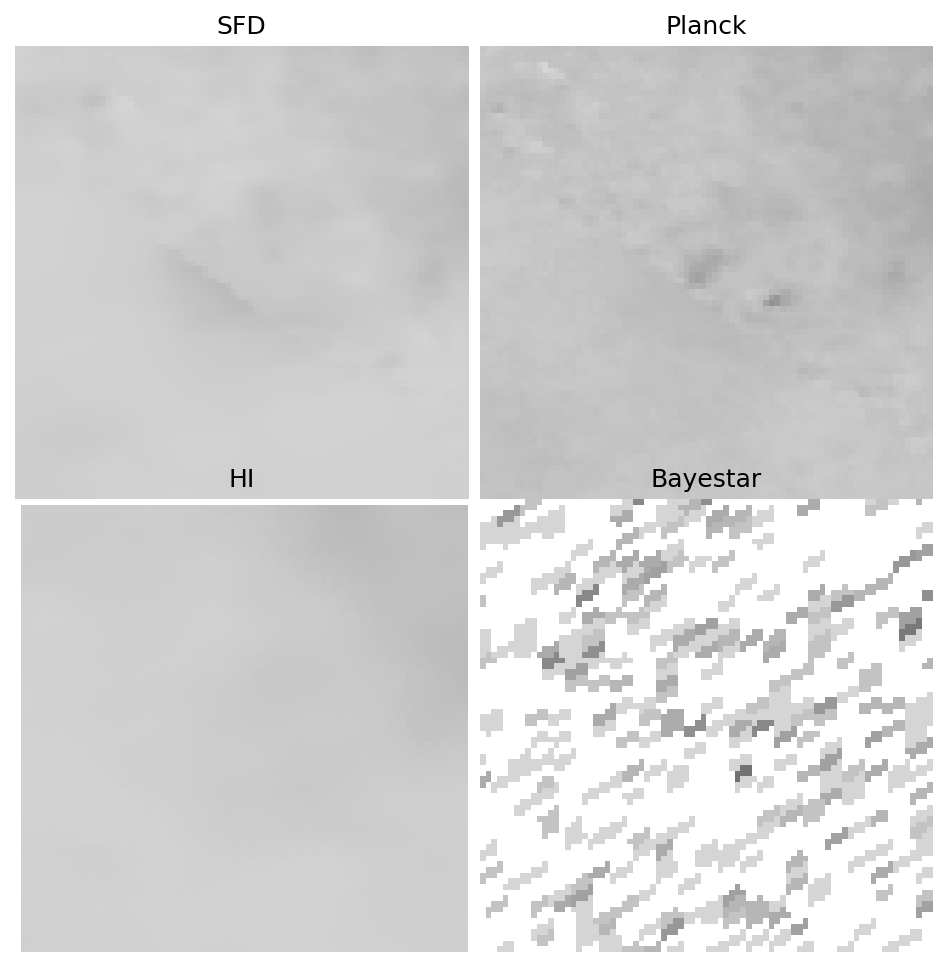

In [12]:
#fig = plt.figure(figsize=(8,8), dpi=150)

#for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
#                               (Av_planck, 'Planck'),
#                         #      (AV_HI, 'HI'),
#                               (Av_bayestar, 'Bayestar')]):
#    ax = fig.add_subplot(2,2,k+1)
fig = plt.figure(figsize=(8,8), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_planck, 'Planck'),
                               (Av_HI, 'HI'),
                               (Av_bayestar, 'Bayestar')]):
    ax = fig.add_subplot(2,2,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig(imagename, dpi=150)
